In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Load the dataset
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
# 1. Exploratory Data Analysis (EDA)
# Display basic statistics and dataset info
print(df.describe())
print(df.info())

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   re

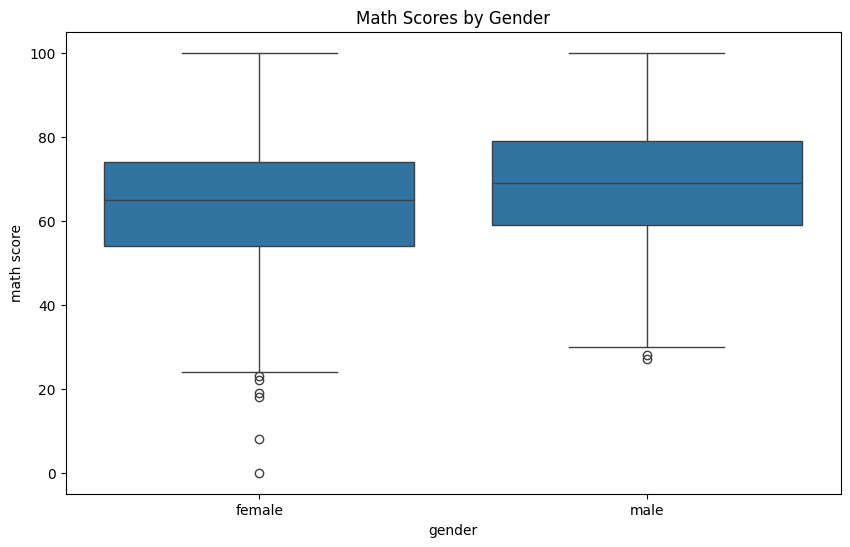

In [4]:
# Visualize the relationship between gender and exam scores
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='math score', data=df)
plt.title('Math Scores by Gender')
plt.show()

In [5]:
# 2. Confidence Interval Calculation using t-tests

# Function to calculate confidence interval using t-test
def ttest_confidence_interval(data1, data2=None, confidence=0.95):
    if data2 is None:
        # One-sample t-test confidence interval
        mean = np.mean(data1)
        sem = stats.sem(data1)  # Standard error of the mean
        df = len(data1) - 1  # Degrees of freedom
        t_crit = stats.t.ppf((1 + confidence) / 2., df)  # t-critical value for two-tailed test
        margin_of_error = t_crit * sem
        return mean, mean - margin_of_error, mean + margin_of_error
    else:
        # Two-sample t-test confidence interval
        t_stat, p_value = stats.ttest_ind(data1, data2)
        mean_diff = np.mean(data1) - np.mean(data2)
        pooled_std_error = np.sqrt(stats.sem(data1)**2 + stats.sem(data2)**2)
        df = len(data1) + len(data2) - 2
        t_crit = stats.t.ppf((1 + confidence) / 2., df)
        margin_of_error = t_crit * pooled_std_error
        return mean_diff, mean_diff - margin_of_error, mean_diff + margin_of_error, p_value

In [6]:
# 2.1 Confidence Interval for Math Scores (Test Preparation Course)
preparation_completed = df[df['test preparation course'] == 'completed']['math score']
preparation_none = df[df['test preparation course'] == 'none']['math score']

mean_diff, ci_low, ci_high, p_value = ttest_confidence_interval(preparation_completed, preparation_none)
print(f"Mean Difference (Test Preparation Completed vs None): {mean_diff}")
print(f"95% CI for Mean Difference: [{ci_low}, {ci_high}]")
print(f"P-value: {p_value}")

Mean Difference (Test Preparation Completed vs None): 5.617649106319291
95% CI for Mean Difference: [3.7127257890767518, 7.522572423561831]
P-value: 1.5359134607147415e-08


In [7]:
# 2.2 Confidence Interval for Reading Scores (Parental Education Level)
bachelors_degree = df[df['parental level of education'] == "bachelor's degree"]['reading score']
high_school = df[df['parental level of education'] == 'high school']['reading score']

mean_diff_education, ci_low_education, ci_high_education, p_value_education = ttest_confidence_interval(bachelors_degree, high_school)
print(f"Mean Difference (Bachelor's Degree vs High School): {mean_diff_education}")
print(f"95% CI for Mean Difference: [{ci_low_education}, {ci_high_education}]")
print(f"P-value: {p_value_education}")

Mean Difference (Bachelor's Degree vs High School): 8.295918367346943
95% CI for Mean Difference: [5.034003049359621, 11.557833685334264]
P-value: 8.804250310784477e-07


In [8]:
# 2.3 Confidence Interval for Writing Scores (Gender Differences)
male_scores = df[df['gender'] == 'male']['writing score']
female_scores = df[df['gender'] == 'female']['writing score']

mean_diff_gender, ci_low_gender, ci_high_gender, p_value_gender = ttest_confidence_interval(male_scores, female_scores)
print(f"Mean Difference (Male vs Female): {mean_diff_gender}")
print(f"95% CI for Mean Difference: [{ci_low_gender}, {ci_high_gender}]")
print(f"P-value: {p_value_gender}")

# Discussion: Based on the results, interpret the confidence intervals and significance of differences between groups.

Mean Difference (Male vs Female): -9.155978147679384
95% CI for Mean Difference: [-10.953105814683061, -7.358850480675708]
P-value: 2.019877706867934e-22


Solution:

Test Preparation Impact on Math Scores:

The mean difference of 5.62 indicates that students who completed the test preparation course scored, on average, 5.62 points higher in math compared to those who did not.
The 95% confidence interval of [3.71, 7.52] suggests that we are 95% confident the true mean difference lies within this range, and since the interval does not include zero, the difference is significant.
The p-value of 1.54e-08 is much less than 0.05, strongly indicating that the effect of test preparation on math scores is statistically significant.
Parental Education Impact on Reading Scores:

The mean difference of 8.30 suggests that students whose parents have a bachelor's degree score, on average, 8.3 points higher in reading compared to those whose parents only have a high school diploma.
The 95% confidence interval of [5.03, 11.56] shows that the true mean difference is highly likely to be positive and significant since the interval does not include zero.
The p-value of 8.80e-07 is far below 0.05, confirming a significant difference in reading scores based on parental education.
Gender Differences in Writing Scores:

The mean difference of -9.16 indicates that, on average, female students score 9.16 points higher in writing compared to male students.
The 95% confidence interval of [-10.95, -7.36] shows that the true mean difference is negative, further supporting the claim that female students perform better in writing.
The p-value of 2.02e-22 is extremely small, confirming a highly significant difference between male and female writing scores.
Inference:

Test preparation significantly improves math scores.
Parental education plays a significant role in reading performance, with higher education levels leading to better scores.
Gender affects writing scores, with females outperforming males. All three factors show statistically significant differences, as indicated by the very low p-values and confidence intervals that do not include zero.
This analysis shows that external factors, such as test preparation, parental background, and gender, have measurable impacts on student performance. The confidence intervals provide insight into the magnitude of these effects and their precision.